In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB

# Data: Superheroes

The following dataset displays superhero characteristics, the character name, and comic publisher. This information was taken from https://www.kaggle.com/claudiodavi/superhero-set/data. Manipulation of the dataset is for academic purposes

In [2]:
df = pd.read_csv('C:\\Users\\cocob\\Downloads\\heroes_information.csv')

## Basic Info about Dataset

In [3]:
df.head()

,name,Gender,Eye color,Race,Race.1,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,ABomb,Male,yellow,Human,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Alien,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Alien,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Alien,Cosmic Entity,Black,99.0,Marvel Comics,NaN,bad,99.0


In [4]:
df.shape

(734, 11)

In [5]:
df.describe()

,Height,Weight
count,734.000000,732.000000
mean,160.790872,107.961749
std,63.845126,85.843309
min,15.200000,2.000000
25%,99.000000,74.000000
50%,175.000000,99.000000
75%,185.000000,99.000000
max,975.000000,900.000000


In [6]:
pd.crosstab(df['Alignment'], df['Gender'],margins=True)

Gender,Female,Male,All
Alignment,,,
bad,35,165,200
good,161,316,477
neutral,4,24,28
All,200,505,705


## Data Transformation

In [7]:
df['Height2'] = np.where(df['Height'] <= 175, 'Short', 'Tall')

In [8]:
df['Weight2'] = np.where(df['Weight'] <= 99, 'Small', 'Big') 

In [9]:
df['Human'] = np.where((df['Race'].isin(['Human'])), 1, 0)

In [10]:
df['Male'] = np.where((df['Gender'].isin(['Male'])), 1, 0)

In [11]:
df['Female'] = np.where((df['Gender'].isin(['Female'])), 1, 0)

In [12]:
df['Good'] = np.where((df['Alignment'].isin(['good'])), 1, 0)

In [13]:
df['Bad'] = np.where((df['Alignment'].isin(['bad'])), 1, 0)

In [14]:
df['Hair'] = np.where((df['Hair color'].isin(['No Hair'])), 'No Hair', 'Hair')

In [15]:
df['Hair2'] = np.where((df['Hair color'].isin(['No Hair'])), 0, 1)

In [16]:
df2=df.dropna()

In [17]:
df2.head()

,name,Gender,Eye color,Race,Race.1,Hair color,Height,Publisher,Skin color,Alignment,Weight,Height2,Weight2,Human,Male,Female,Good,Bad,Hair,Hair2
1,Abe Sapien,Male,blue,Alien,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Tall,Small,0,1,0,1,0,No Hair,0
2,Abin Sur,Male,blue,Alien,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Tall,Small,0,1,0,1,0,No Hair,0
34,Apocalypse,Male,red,Mutant,Mutant,Black,213.0,Marvel Comics,grey,bad,135.0,Tall,Big,0,1,0,0,1,Hair,1
39,Archangel,Male,blue,Mutant,Mutant,Blond,183.0,Marvel Comics,blue,good,68.0,Tall,Small,0,1,0,1,0,Hair,1
41,Ardina,Female,white,Alien,Alien,Orange,193.0,Marvel Comics,gold,good,98.0,Tall,Small,0,0,1,1,0,Hair,1


## Exploratory Analysis

## Feature Correlation

In [18]:
df2.corr()

,Height,Weight,Human,Male,Female,Good,Bad,Hair2
Height,1.000000,0.073728,-0.052855,0.116600,-0.116600,0.078180,-0.088085,-0.166414
Weight,0.073728,1.000000,0.168399,0.276783,-0.276783,-0.193114,0.060165,-0.152659
Human,-0.052855,0.168399,1.000000,-0.159176,0.159176,-0.048828,0.135037,0.185581
Male,0.116600,0.276783,-0.159176,1.000000,-1.000000,-0.113685,0.053561,-0.373097
Female,-0.116600,-0.276783,0.159176,-1.000000,1.000000,0.113685,-0.053561,0.373097
Good,0.078180,-0.193114,-0.048828,-0.113685,0.113685,1.000000,-0.756100,-0.156987
Bad,-0.088085,0.060165,0.135037,0.053561,-0.053561,-0.756100,1.000000,-0.007285
Hair2,-0.166414,-0.152659,0.185581,-0.373097,0.373097,-0.156987,-0.007285,1.000000


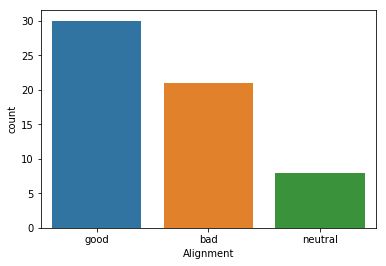

In [19]:
sns.countplot(x='Alignment', data=df2);

The graph above demonstrates how many superheros are bad, good, or neutral. For the purpose of this project, main focus will be directed toward good and bad alignment. The analysis below will determine which gender, skin color, hair, and race generate what alignment.

### Height and Weight determination for Alignment

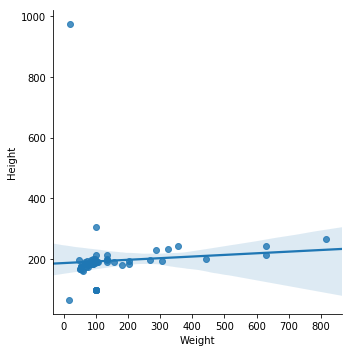

In [20]:
df5 = sns.lmplot(y='Height', x='Weight', data=df2, fit_reg=True)

The scatter plot above shows as height increase, so does weight. The following charts will determine alignment depending on height and weight classes.

Text(0.5,1,'Weight')

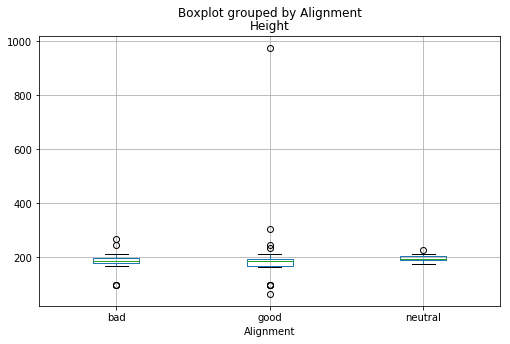

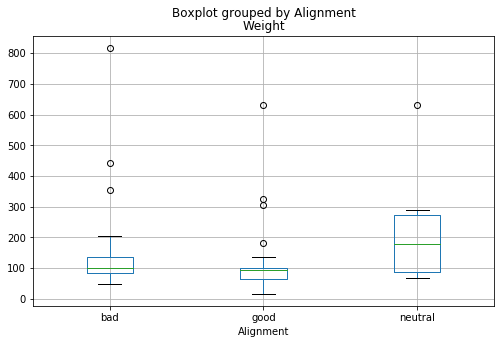

In [21]:
df2.boxplot('Height', by= 'Alignment', figsize=(8,5))
plt.title('Height')
df2.boxplot('Weight', by= 'Alignment', figsize=(8,5))
plt.title('Weight')

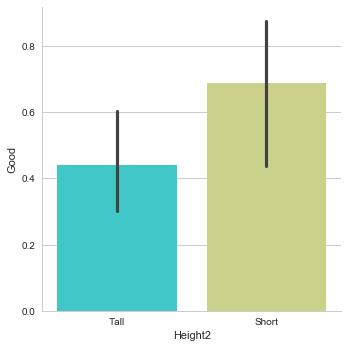

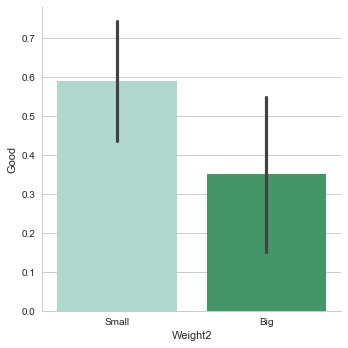

In [22]:
sns.set(style='whitegrid')
sns.factorplot(x='Height2', y='Good', data=df2, size=5, kind='bar', palette='rainbow')
plt.show()

sns.set(style='whitegrid')
sns.factorplot(x='Weight2', y='Good', data=df2, size=5, kind='bar', palette='BuGn')
plt.show()

Based on the graphics above, short and small superheros are more likely to be good than big and tall superheros. As height and weight increases, superhero alignment shifts towards bad.

Gender and Alignment Correlation

In [23]:
df3 = pd.crosstab(df['Alignment'], df['Race'],margins=True)

In [24]:
stats.ttest_ind(df['Bad'], df['Male'])

Ttest_indResult(statistic=-17.01899303313765, pvalue=2.0534843544272114e-59)

In [25]:
stats.ttest_ind(df['Good'], df['Male'])

Ttest_indResult(statistic=-0.5040477086887254, pvalue=0.6143035910718535)

In [26]:
stats.ttest_ind(df['Bad'], df['Female'])

Ttest_indResult(statistic=0.40788221587086176, pvalue=0.6834197088324643)

In [27]:
stats.ttest_ind(df['Good'], df['Female'])

Ttest_indResult(statistic=16.900485622867876, pvalue=1.1084252540076607e-58)

Given the p-values, there is a correlation between gender and alignment. Males are more likely to be bad in comparison to females who have a stronger correlation for being good. The graph below visualizes this point.

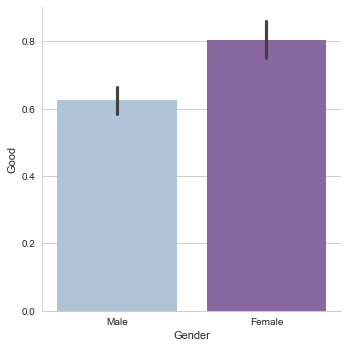

In [28]:
sns.set(style='whitegrid')
sns.factorplot(x='Gender', y='Good', data=df, size=5, kind='bar', palette='BuPu')
plt.show()

### Alignment by Physical Features

#### Hero Alignment Given Skin Color

In [29]:
pd.crosstab(df['Alignment'], df['Skin color'],margins=True)

Skin color,black,blue,bluewhite,gold,gray,green,grey,orange,orange / white,pink,purple,red,red / black,silver,white,yellow,All
Alignment,,,,,,,,,,,,,,,,,
bad,1,3,0,0,0,6,4,0,0,0,2,4,1,3,3,1,28
good,0,5,0,2,1,14,1,1,1,2,0,3,0,2,3,0,35
neutral,0,1,1,1,0,1,0,0,0,0,1,2,0,0,1,1,9
All,1,9,1,3,1,21,5,1,1,2,3,9,1,5,7,2,72


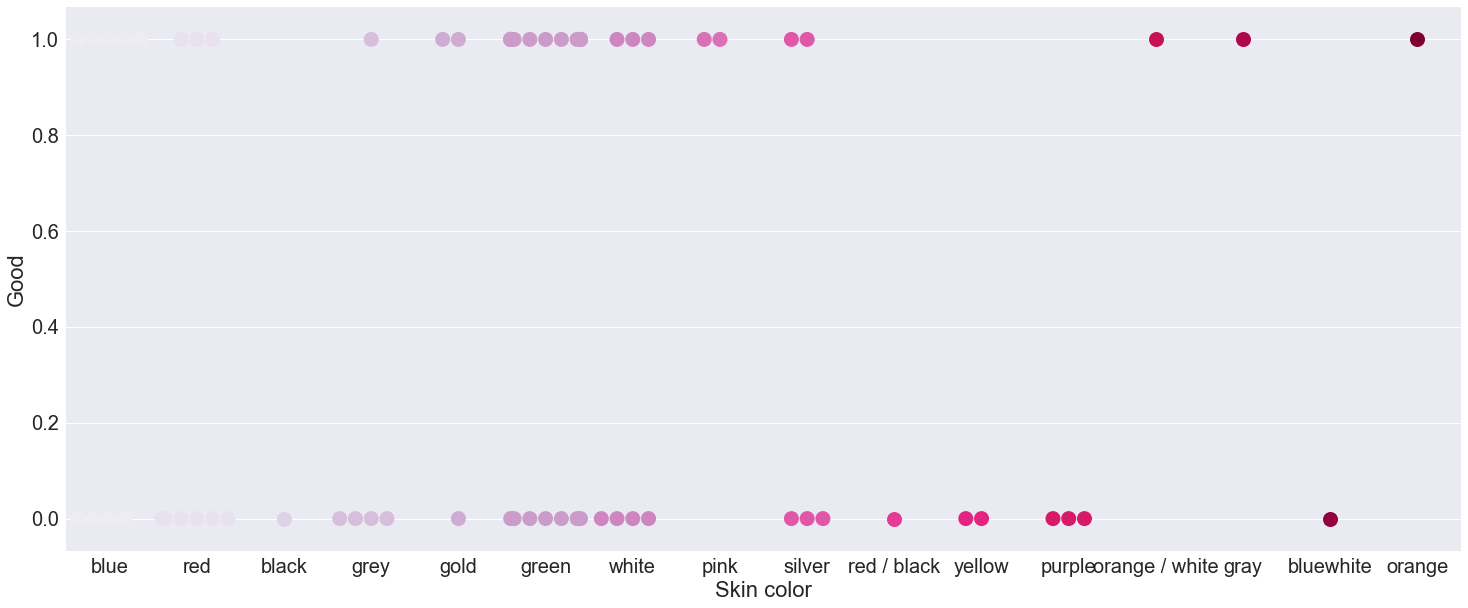

In [30]:
sns.set(font_scale=2)
plt.subplots(figsize=(25,10))
sns.swarmplot(x='Skin color', y='Good', data=df, size=15, palette='PuRd')
plt.show()

Shown above is the superhero alignment by skin color. Most notable colors were blue, red, grey, and green since majority of superheroes are these colors. Grey superheroes illustrate 4/5 chance in being bad. While the black superhero is likely to align as bad, the n value in only one.

Upon inspection, grey spectrum skin colors were more likely to display bad alignment in comparison to the remaining colors. This notion demonstrates that color vibrancy may be an indicator of character alignment. Green superheroes clearly promote this notion as they are mostly likely to be good.

#### Alignment based on Hair

In [31]:
df['Hair2'] = np.where((df['Hair color'].isin(['No Hair'])), 0, 1)
stats.ttest_ind(df['Bad'], df['Hair2'])

Ttest_indResult(statistic=-30.736655498666014, pvalue=1.518703872000688e-160)

In [32]:
stats.ttest_ind(df['Good'], df['Hair2'])

Ttest_indResult(statistic=-10.783684960480832, pvalue=3.8190308232290055e-26)

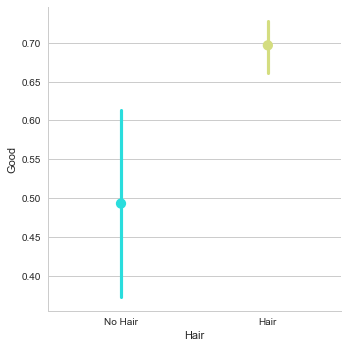

In [33]:
sns.set(style='whitegrid')
sns.factorplot(x='Hair', y='Good', data=df, kind='point', palette='rainbow', size=5)
plt.show()

Based on the info provided above, superhereos with hair are more likely to align good. Contrastly, superhereos without hair are more likely to align bad.

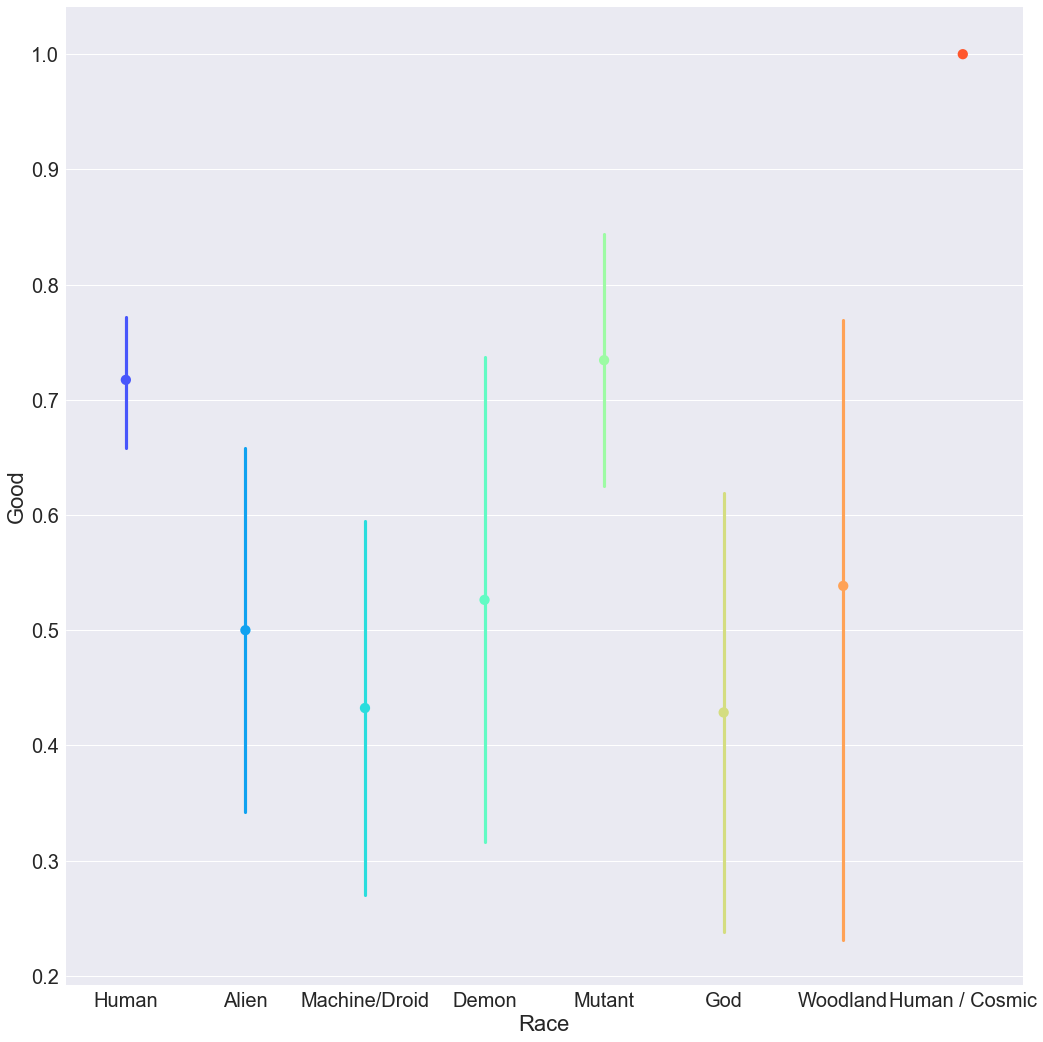

In [34]:
sns.set(font_scale=2)
sns.factorplot(x='Race', y='Good', data=df, kind='point', palette='rainbow', size=15)
plt.show()

Most Races vary staying within between bad and almost good. Woodland, Demon, and god consist of a wide range. Humans and Mutants trend closer to good. While Human/Cosmic aligns good, there is only a n value of one.

## Random Forest

In [35]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [36]:
rfc = ensemble.RandomForestClassifier()
X = df2['Gender'] + df2['Race'] + df2['Skin color']
Y = df2['Alignment']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X = np.array(X.dropna(axis=1))
Y = pd.get_dummies(Y)

cross_val_score(rfc, X, Y, cv=10)

array([0.16666667, 0.5       , 0.5       , 0.5       , 0.16666667,
       0.16666667, 0.33333333, 0.        , 0.        , 0.6       ])

In [37]:
rfc.fit(X, Y)
rfc.score(X, Y)

0.7627118644067796

Based on the resultws above, gender, race, and skin color are good predictors for alignment.

## Conclusion

Based on the analysis, the following observations appear. 
   -Short and small superhereos trend more likely to be good
   -Having hair trends good as well
   -Females trend more likely to be good
   -Grey spectrum skin colors frend more likely to bad
   -Human and Mutant races trend more likely to be good